In [4]:
from models import DampedOscillatorPINN

import matplotlib.pyplot as plt
from torch import nn

%config InlineBackend.figure_format = 'retina'

## **Damped Harmonic Oscillator**

Solving the ODE for a damped harmonic oscillator with a "naive" approach and using a PINN.

$$ m \frac{d^2 x}{d t^2}+\gamma \frac{d x}{d t}+k x=0 $$

In [5]:
model = DampedOscillatorPINN(n_hidden_layers=4, n_neurons_per_layer=20, activation = nn.Tanh)

model.setup_domain(n_collocation=10000, n_data=10)

Using device: cuda
Domain setup: 10000 collocation points, 10 data points
Domain setup: 10000 collocation points, 10 data points


In [6]:
losses = model.train(adam_epochs=1000, lbfgs_epochs=50000, verbose = True)

Starting Adam optimization...
Adam - Epoch 0/1000, Loss: 2.176633e+02
Adam - Epoch 100/1000, Loss: 3.538051e+00
Adam - Epoch 200/1000, Loss: 3.121702e+00
Adam - Epoch 300/1000, Loss: 2.847534e+00
Adam - Epoch 400/1000, Loss: 2.366067e+00
Adam - Epoch 500/1000, Loss: 1.945220e+00
Adam - Epoch 600/1000, Loss: 1.804877e+00
Adam - Epoch 700/1000, Loss: 1.667534e+00
Adam - Epoch 800/1000, Loss: 1.511086e+00
Adam - Epoch 900/1000, Loss: 1.308659e+00
Adam - Epoch 999/1000, Loss: 1.057057e+00

Starting L-BFGS optimization...
L-BFGS - Iteration 100, Loss: 4.334943e-01
L-BFGS - Iteration 200, Loss: 2.898101e-01
L-BFGS - Iteration 300, Loss: 2.143615e-01
L-BFGS - Iteration 400, Loss: 1.708769e-01
L-BFGS - Iteration 500, Loss: 1.407679e-01
L-BFGS - Iteration 600, Loss: 1.302886e-01
L-BFGS - Iteration 700, Loss: 1.191146e-01
L-BFGS - Iteration 800, Loss: 1.113116e-01
L-BFGS - Iteration 900, Loss: 9.676138e-02
L-BFGS - Iteration 1000, Loss: 9.060942e-02
L-BFGS - Iteration 1100, Loss: 7.945786e-02
L-

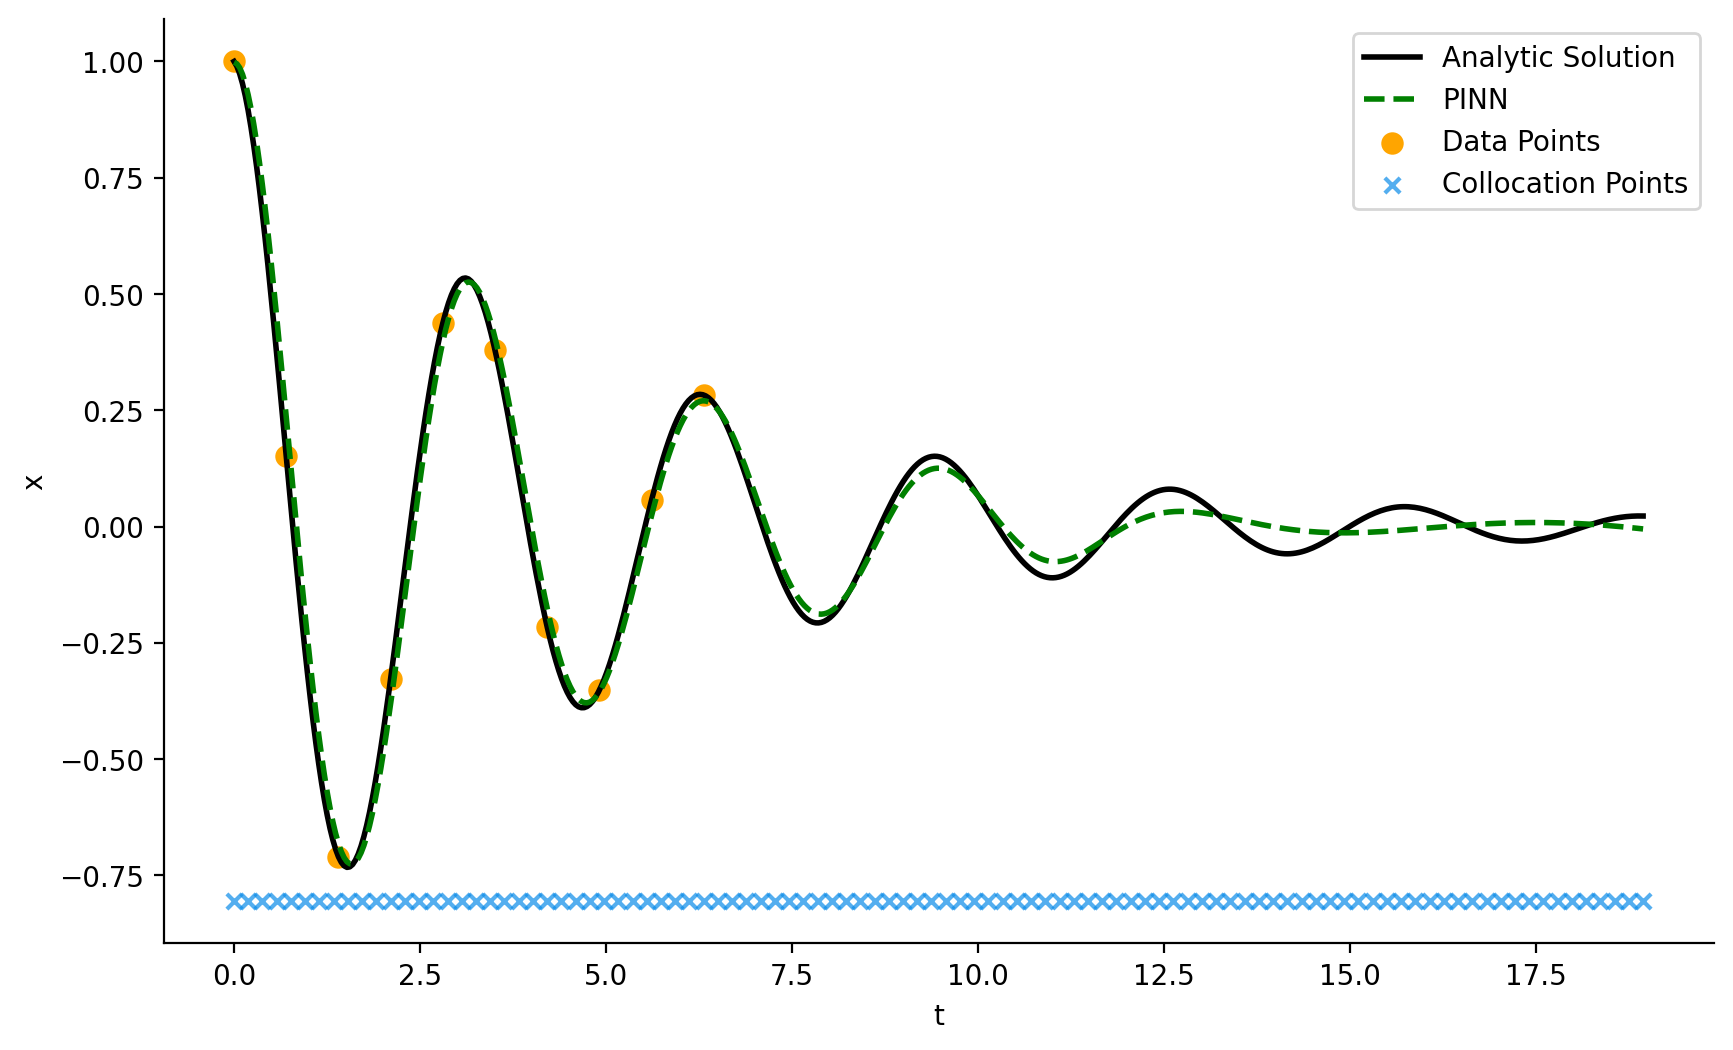

In [7]:
model.visualize()

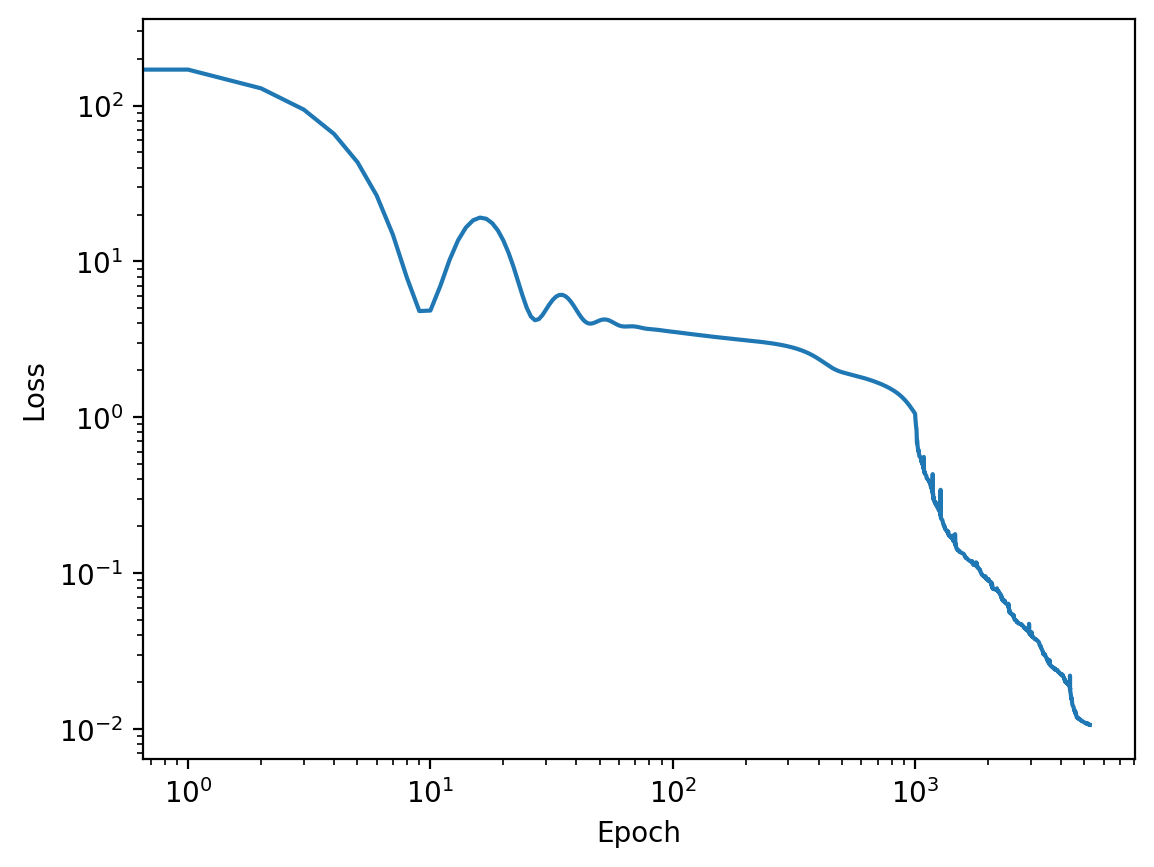

In [10]:
plt.plot(losses)
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()